# <center><b><h1>NeuralNetwork (All Features)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../Data/X_train.csv", index_col=0)
df_X_train.shape

(12312, 16)

In [3]:
df_y_train = pd.read_csv("../Data/y_train.csv", index_col=0)
df_y_train.shape

(12312, 1)

In [4]:
df_X_val = pd.read_csv("../Data/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../Data/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [6]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.5 Actual_Score:  0.5
I:  2 Best_I:  2 Best_Score:  0.52837871973652 Actual_Score:  0.52837871973652
I:  3 Best_I:  3 Best_Score:  0.5477142457142167 Actual_Score:  0.5477142457142167
I:  4 Best_I:  4 Best_Score:  0.5626315454364078 Actual_Score:  0.5626315454364078
I:  5 Best_I:  4 Best_Score:  0.5626315454364078 Actual_Score:  0.559973524650623
I:  6 Best_I:  4 Best_Score:  0.5626315454364078 Actual_Score:  0.5570614109832741
I:  7 Best_I:  7 Best_Score:  0.5635557406900784 Actual_Score:  0.5635557406900784
I:  8 Best_I:  8 Best_Score:  0.5845777405661376 Actual_Score:  0.5845777405661376
I:  9 Best_I:  9 Best_Score:  0.5928677009050705 Actual_Score:  0.5928677009050705
I:  10 Best_I:  10 Best_Score:  0.5975280935707958 Actual_Score:  0.5975280935707958
I:  11 Best_I:  10 Best_Score:  0.5975280935707958 Actual_Score:  0.5906372618295481
I:  12 Best_I:  12 Best_Score:  0.6111152965284474 Actual_Score:  0.6111152965284474
I:  13 Best_I:  12 Best_Score:  0

In [7]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  4 Best_Score:  0.5253950472411073 Actual_Score:  0.5
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  25 Best_Score:  0.5540397863305352 Actual_Score:  0.5163330545294329
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I,

I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  17 Best_J:  29 Best_Score:  0.6987782853390084 Actual_Score:  0.676865342628392
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  18 Best_J:  31 Best_Score:  0.7210215794974653 Actual_Score:  0.7210215794974653
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 18

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.6427502263431711 Actual_Score:  0.6427502263431711
I:  2 Best_Random_State:  1 Best_Score:  0.6427502263431711 Actual_Score:  0.6409354425065674
I:  3 Best_Random_State:  3 Best_Score:  0.6488336005492695 Actual_Score:  0.6488336005492695
I:  4 Best_Random_State:  4 Best_Score:  0.6534347151098993 Actual_Score:  0.6534347151098993
I:  5 Best_Random_State:  5 Best_Score:  0.6655136327360998 Actual_Score:  0.6655136327360998
I:  6 Best_Random_State:  5 Best_Score:  0.6655136327360998 Actual_Score:  0.6483774661581062
I:  7 Best_Random_State:  5 Best_Score:  0.6655136327360998 Actual_Score:  0.6547102335075559
I:  8 Best_Random_State:  5 Best_Score:  0.6655136327360998 Actual_Score:  0.6573491010888657
I:  9 Best_Random_State:  5 Best_Score:  0.6655136327360998 Actual_Score:  0.6536841082532504
I:  10 Best_Random_State:  10 Best_Score:  0.6668910811343911 Actual_Score:  0.6668910811343911
I:  11 Best_Random_State:  10 Best_Score:  0.6668910811343

I:  87 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6641072774052835
I:  88 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6503017609801
I:  89 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6672879374204588
I:  90 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.645063796466477
I:  91 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6424842069902631
I:  92 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.642363123785153
I:  93 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6464701517972933
I:  94 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6512422281917033
I:  95 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6294268699951331
I:  96 Best_Random_State:  16 Best_Score:  0.6787513310414356 Actual_Score:  0.6643566705486348
I:  97 Best_Random_State:  16 Best_Score:  0.

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.7024132612536766 Actual_Score:  0.7024132612536766
I:  2 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.723696226492807
I:  3 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.6320588650949356
I:  4 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.6981255176797067
I:  5 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.670124146773155
I:  6 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.6855597402381477
I:  7 Best_Random_State:  2 Best_Score:  0.723696226492807 Actual_Score:  0.7073400275239341
I:  8 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.741901524472269
I:  9 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6593659264350685
I:  10 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.7266260291245847
I:  11 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Scor

I:  89 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6913033635199801
I:  90 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6696347599628782
I:  91 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6475082035229427
I:  92 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6400922055573861
I:  93 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6510069342629903
I:  94 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.7206941092961672
I:  95 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.7107032215926096
I:  96 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6831178601766006
I:  97 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.6860610535197685
I:  98 Best_Random_State:  8 Best_Score:  0.741901524472269 Actual_Score:  0.7103826238728185
I:  99 Best_Random_State:  8 Best_Score:  0.741901524472269 

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "Two Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  31
For the layer  2  the best number of neurons is :  1


### 4.3 Confusion Matrix

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[26852  3221]
 [  288   416]]


### 4.2 Accuracy

In [12]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.8859862884621633


### 4.3 Recall (or Sensitivity)

In [13]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.5909090909090909


### 4.4 Error

In [14]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.1140137115378367


### 4.5 Specificity

In [15]:
specificity = tn / (tn+fp)

print(specificity)

0.8928939580354471


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [16]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.10710604196455292
0.10710604196455287


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [17]:
precision = tp / float(tp+fp)

print(precision)

0.114379983502887


## 5 Metrics visualization

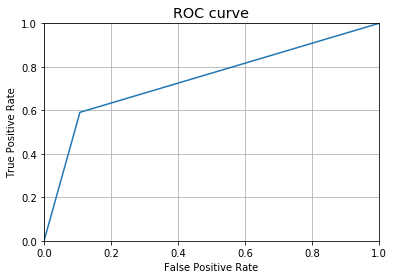

In [18]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)